In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('germany_auto_industry_dataset.csv')

In [3]:
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,500.0,2014.30200,5.504125,2005.00,2009.7500,2014.000,2019.00,2023.00
Mileage,500.0,158885.27000,85604.122684,5667.00,85787.2500,160433.500,234079.75,299573.00
Fuel Consumption (L/100km),500.0,7.63080,2.654805,3.00,5.3000,7.900,10.00,12.00
Horsepower (HP),500.0,281.11200,121.169251,70.00,175.0000,279.500,385.00,500.00
Price,500.0,51064.28894,28652.646997,5209.73,24478.0575,52892.525,75037.67,99981.48


In [14]:
df['Price '].mean()

51064.28894

In [15]:
df['Price '].std()

28652.646996579882

In [17]:
df['Price '].var()

820974179.9106181

In [47]:
car_prices = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 95000]
cdf_list = []
for price in car_prices:
    # Count the number of occurances of price less than or equal to the value
    count = 0  
    for i in range(len(df)):
        if df['Price '][i] <= price:
            count += 1
    print(f'Number of cars that have price less than or equal to {price} = {count}') 
    # cdf calculation: Total days price is less than or equal to a / Total cars
    cdf = round(count / len(df), 3)
    cdf_list.append(cdf)
    print(f'CDF or f({price}) = {cdf}')

Number of cars that have price less than or equal to 10000 = 33
CDF or f(10000) = 0.066
Number of cars that have price less than or equal to 20000 = 91
CDF or f(20000) = 0.182
Number of cars that have price less than or equal to 30000 = 157
CDF or f(30000) = 0.314
Number of cars that have price less than or equal to 40000 = 208
CDF or f(40000) = 0.416
Number of cars that have price less than or equal to 50000 = 242
CDF or f(50000) = 0.484
Number of cars that have price less than or equal to 60000 = 287
CDF or f(60000) = 0.574
Number of cars that have price less than or equal to 70000 = 348
CDF or f(70000) = 0.696
Number of cars that have price less than or equal to 80000 = 395
CDF or f(80000) = 0.79
Number of cars that have price less than or equal to 90000 = 441
CDF or f(90000) = 0.882
Number of cars that have price less than or equal to 95000 = 470
CDF or f(95000) = 0.94


In [19]:
cdf_list_ggl_sht = [0.076, 0.139, 0.231, 0.350
, 0.485, 0.622, 0.745, 0.843, 0.913, 0.937]

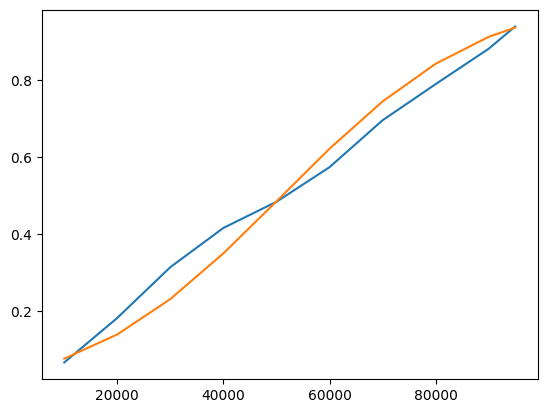

In [20]:
plt.plot(car_prices, cdf_list)
plt.plot(car_prices, cdf_list_ggl_sht)

In [21]:
cdf_list

[0.066, 0.182, 0.314, 0.416, 0.484, 0.574, 0.696, 0.79, 0.882, 0.94]

In [23]:
data = {'Price': [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 95000],
        'CDF': [0.066, 0.182, 0.314, 0.416, 0.484, 0.574, 0.696, 0.79, 0.882, 0.94],
               'Google_CDF': [0.076, 0.139, 0.231, 0.350
, 0.485, 0.622, 0.745, 0.843, 0.913, 0.937]}

In [25]:
price_cdf_data = pd.DataFrame(data=data)

In [26]:
price_cdf_data

,Price,CDF,Google_CDF
0,10000,0.066,0.076
1,20000,0.182,0.139
2,30000,0.314,0.231
3,40000,0.416,0.350
4,50000,0.484,0.485
5,60000,0.574,0.622
6,70000,0.696,0.745
7,80000,0.790,0.843
8,90000,0.882,0.913
9,95000,0.940,0.937


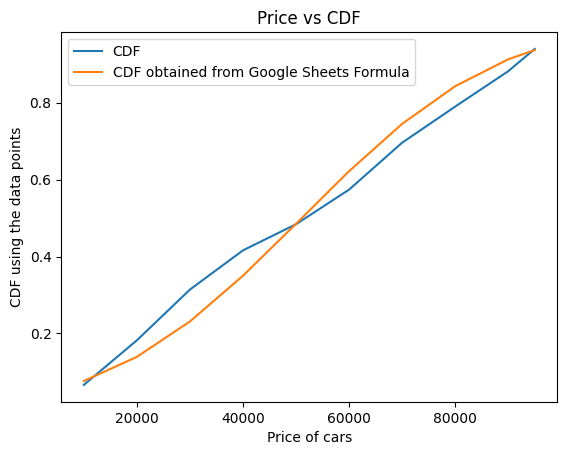

In [48]:
plt.plot(price_cdf_data['Price'], price_cdf_data['CDF'])
plt.plot(price_cdf_data['Price'], price_cdf_data['Google_CDF'])
plt.title('Price vs CDF')
plt.xlabel('Price of cars')
plt.ylabel('CDF using the data points')
plt.legend(['CDF', 'CDF obtained from Google Sheets Formula'])

$\sum_{n=1}^{500} \frac{x_i - E[X]^2}{500}$